In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [25]:
# Importing the libraries 
import pandas as pd
import numpy as np
import math
from patsy import dmatrices

from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.datasets import make_classification

#tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                           
from ipywidgets import interactive

#visualisation 
import matplotlib.pyplot as plt  
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

#data modeling
import seaborn as sns
import statsmodels.api as sm

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Problem 1 - Exploration and Logistic Regression

In [3]:
df = pd.read_csv("/content/drive/My Drive/AE_PJ/gerber.csv")
df.head()

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0


In [4]:
df['voting'].value_counts(normalize=True) * 100

0    68.410039
1    31.589961
Name: voting, dtype: float64

In [5]:
df.groupby(['voting']).mean()*100

,sex,yob,hawthorne,civicduty,neighbors,self,control
voting,,,,,,,
0,50.366629,195750.171207,10.998012,11.129284,10.095247,10.632233,57.145224
1,48.978803,195342.428424,11.330684,11.059285,13.282917,12.135681,52.191433


In [6]:
#or
pd.pivot_table(df, values=['hawthorne', 'civicduty', 'neighbors', 'self'], index=['voting'])

,civicduty,hawthorne,neighbors,self
voting,,,,
0,0.111293,0.109980,0.100952,0.106322
1,0.110593,0.113307,0.132829,0.121357


Build a logistic regression model for voting using the four treatment group variables as the independent variables (civicduty, hawthorne, self, and neighbors). Use all the data to build the model (DO NOT split the data into a training set and testing set). 

In [7]:
df.columns

Index(['sex', 'yob', 'voting', 'hawthorne', 'civicduty', 'neighbors', 'self',
       'control'],
      dtype='object')

In [8]:
formula = 'Q("voting") ~ civicduty + neighbors + self + hawthorne '

y, X = dmatrices(formula, data=df , return_type="dataframe")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
mod = sm.Logit(y, X)    # Describe model
res = mod.fit()       # Fit model

print(res.summary())

#import statsmodels.api as sm

# X = gerber[['hawthorne','civicduty','neighbors','self',	'control']]
# Y = gerber[['voting']]

# res = sm.Logit(Y, X).fit()
# print(res.summary())

Optimization terminated successfully.
         Current function value: 0.622071
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Q("voting")   No. Observations:               344084
Model:                          Logit   Df Residuals:                   344079
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:                0.002675
Time:                        13:39:46   Log-Likelihood:            -2.1404e+05
converged:                       True   LL-Null:                   -2.1462e+05
Covariance Type:            nonrobust   LLR p-value:                2.547e-247
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8634      0.005   -172.459      0.000      -0.873      -0.854
civicduty      0.0844      0.

In [9]:
res.pred_table(threshold=0.3)

array([[134513., 100875.],
       [ 56730.,  51966.]])

In [10]:
tn, fp, fn, tp = res.pred_table(threshold=0.3).ravel()

print("accuracy for 0.3 threshold",(tn+tp)/(tn+fp+fn+tp))

accuracy for 0.3 threshold 0.5419577777519443


In [11]:
tn, fp, fn, tp = res.pred_table(threshold=0.5).ravel()

print("accuracy for 0.5 threshold ",(tn+tp)/(tn+fp+fn+tp))

accuracy for 0.5 threshold  0.6841003940898153


In [12]:
# from sklearn.metrics import roc_auc_score

# # predict outcome probabilities using training data
# y_prob = mod.predict_proba(X)

# # P('voting'=1)>= cutoff
# y_pred = y_prob[:,1]>=0.3

# (y_pred == y).sum()/len(y)

# roc_auc_score(y, y_pred)


In [28]:
from sklearn.metrics import roc_curve, auc
prediction_train = res.predict(X)
fpr, tpr, thresholds = roc_curve(y, prediction_train)

print(auc(fpr, tpr))

0.5308461492064048


Even though all of the variables are significant, this is a weak predictive model.

#Problem 2 : Trees

In [13]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

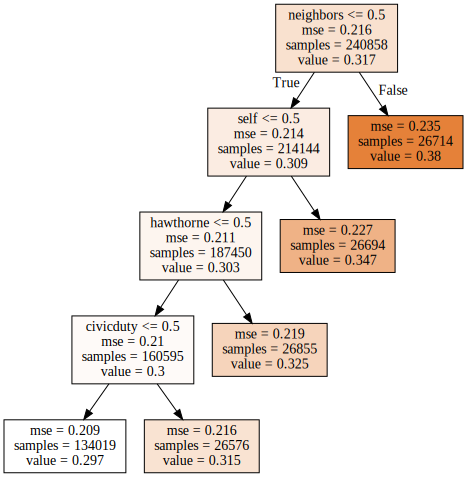

In [32]:
#Build CART Model
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X,y)
rt = dtr.fit(X_train, y_train)
rt

names = X.columns
dot_data = tree.export_graphviz(rt, feature_names= names, class_names=sorted(y), filled=True)
graphviz.Source(dot_data)


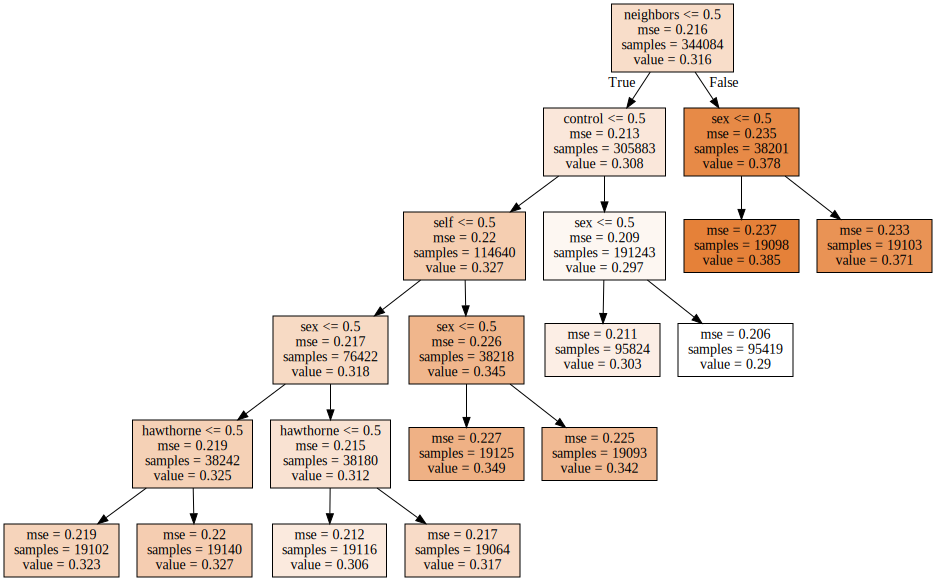

In [37]:
X2 = df[['hawthorne','civicduty','neighbors','self',	'control', 'sex']]

dtr2 = DecisionTreeRegressor().fit(X2,y)
rt2 = dtr.fit(X2, y)

dot_data2 = tree.export_graphviz(rt2, feature_names= X2.columns, class_names=sorted(y), filled=True)
graphviz.Source(dot_data2)

In [21]:
#If you plot the tree, with prp(CARTmodel), you should just see one leaf! There are no splits in the tree, because none of the variables make a big enough effect to be split on.
# No variables are used (the tree is only a root node) - none of the variables make a big enough effect to be split on.

#Problem 3: Interaction terms

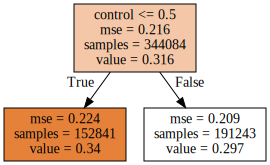

In [44]:
control =  pd.DataFrame(df['control'])
dtr3 = DecisionTreeRegressor().fit(control,y)

dot_data_control = tree.export_graphviz(dtr3,feature_names=control.columns, class_names=sorted(y), filled=True)
graphviz.Source(dot_data_control)

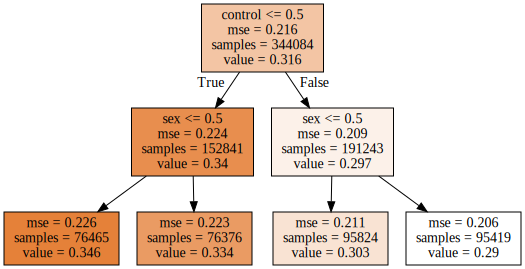

In [46]:
cs =  pd.DataFrame(df[['control','sex']])
dtr4 = DecisionTreeRegressor().fit(cs,y)

dot_data_cs = tree.export_graphviz(dtr4,feature_names=cs.columns, class_names=sorted(y), filled=True)
graphviz.Source(dot_data_cs)

In [48]:
logcs = sm.Logit(y, cs).fit()
print(logcs.summary())

Optimization terminated successfully.
         Current function value: 0.636972
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Q("voting")   No. Observations:               344084
Model:                          Logit   Df Residuals:                   344082
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:                -0.02121
Time:                        13:59:53   Log-Likelihood:            -2.1917e+05
converged:                       True   LL-Null:                   -2.1462e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
control       -0.6436      0.006   -112.615      0.000      -0.655      -0.632
sex           -0.4624      0.